In [1]:
import os
import geopandas as gpd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#https://geohackweek.github.io/vector/06-geopandas-advanced/

In [2]:
#Bajo la data de censo
urlCenso = 'https://data.buenosaires.gob.ar/api/files/informacion-censal-por-radio-2010-rar.rar/download'
os.system('wget ' + urlCenso + ' -O /home/pipe/projects/subteH/data/censo.rar')
os.system('unrar e data/censo.rar data/')

#bajo data estaciones
urlEstaciones = 'https://data.buenosaires.gob.ar/api/files/estaciones-de-subte-rar.rar/download'
os.system('wget ' + urlEstaciones + ' -O /home/pipe/projects/subteH/data/estaciones.rar')
os.system('unrar e data/estaciones.rar data/')

65280

In [3]:
carto = gpd.read_file('data/informacion_censal_por_radio_2010.shp')
carto.head()

,COMUNA,CO_FRAC_RA,FRACCION,H_CON_NBI,H_SIN_NBI,ID,RADIO,TOTAL_POB,T_HOGAR,T_MUJER,T_VARON,T_VIVIENDA,V_COLECTIV,V_PARTICUL,geometry
0,1,1_1_1,1,19.0,46.0,1,1,336,65.0,124,212,82.0,2.0,80,"POLYGON ((108330.8437499999 104181.0937500013,..."
1,1,1_12_1,12,25.0,91.0,2,1,341,116.0,157,184,365.0,4.0,361,"POLYGON ((107042.4609375 102801.421875, 107058..."
2,1,1_12_10,12,1.0,100.0,3,10,296,101.0,134,162,629.0,2.0,627,"POLYGON ((107697.2187500009 102707.15625, 1078..."
3,1,1_12_11,12,7.0,129.0,4,11,528,136.0,234,294,375.0,5.0,370,"POLYGON ((108748.546875 102668.9453125009, 108..."
4,1,1_12_2,12,16.0,113.0,5,2,229,129.0,128,101,445.0,0.0,445,"POLYGON ((107169.9375 102810.3671875, 107300.3..."


In [4]:
#chequeo la proyeccion https://epsg.io/5345
carto.crs

{u'ellps': u'intl',
 u'k': 0.999998,
 u'lat_0': -34.6297166,
 u'lon_0': -58.4627,
 u'no_defs': True,
 u'proj': u'tmerc',
 u'units': u'm',
 u'x_0': 100000,
 u'y_0': 100000}

In [5]:
carto = carto.to_crs(epsg=5345)

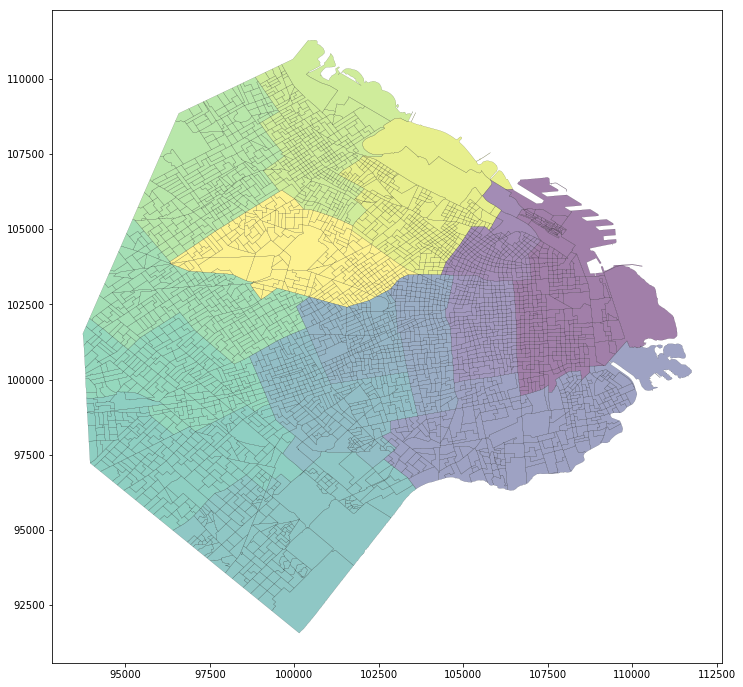

In [13]:
#http://darribas.org/gds15/content/labs/lab_03.html
f, ax = plt.subplots(1, figsize=(12, 12))
ax = carto.plot(column='COMUNA',linewidth=0.1,ax=ax)



In [6]:
#cargo estaciones y ploteo
estaciones = gpd.read_file('data/estaciones_de_subte.shp')
estaciones = estaciones.to_crs(epsg=5345)


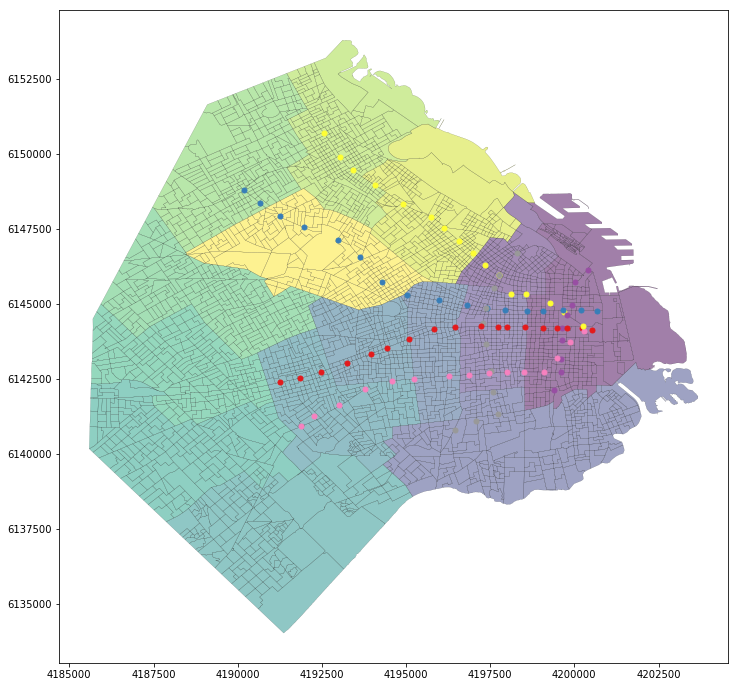

In [35]:

f, ax = plt.subplots(1, figsize=(12, 12))
ax = carto.plot(column='COMUNA',linewidth=0.1,ax=ax)
ax = estaciones.plot(column='LINEA',ax=ax, markersize=5)


In [41]:
#reducimos la dimension del problema, ya sabemos que hay muchas comunas que ni interactuan 
comunasConH = [1,2,3,4,5,14]
carto = carto[carto.COMUNA.isin(comunasConH)]

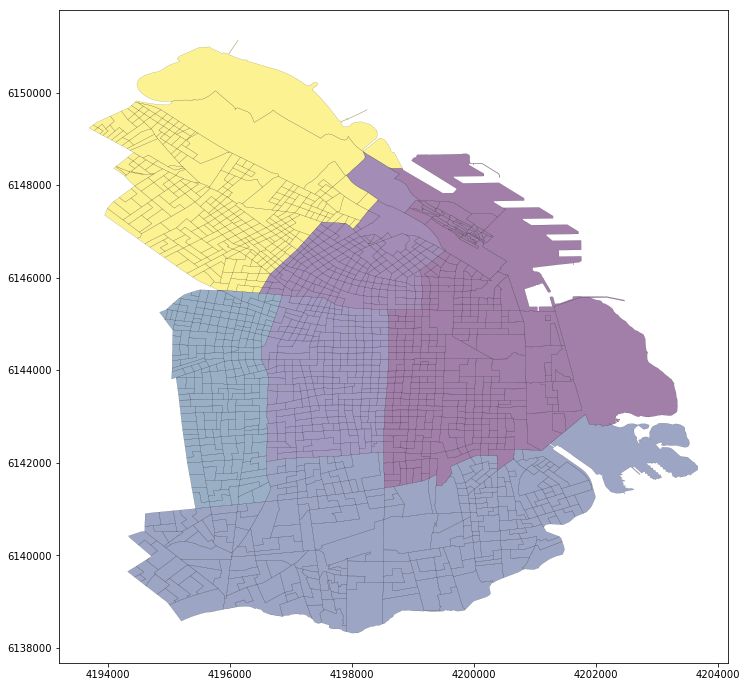

In [42]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = carto.plot(column='COMUNA',linewidth=0.1,ax=ax)

In [8]:
#CHEQUEAR SI NO HAGO UNA COPIA Y CAMBIO LA GEOMETRIA EN LINEA H CAMBIA EN ESTACIONES
lineaH = estaciones.copy()[estaciones.LINEA == 'H']
#lineaH.geometry = lineaH.geometry.buffer(100)

In [9]:
lineaH

,ESTACION,ID,LINEA,geometry
0,CASEROS,1.0,H,POINT (4197727.063387774 6141333.360672265)
1,INCLAN,2.0,H,POINT (4197593.042159097 6142056.945508167)
2,HUMBERTO 1°,3.0,H,POINT (4197521.574693957 6142765.575720645)
3,VENEZUELA,4.0,H,POINT (4197366.159205765 6143655.914850389)
4,ONCE - 30 DE DICIEMBRE,5.0,H,POINT (4197299.286664494 6144366.822915621)
76,CORRIENTES,77.0,H,POINT (4197390.663593302 6144857.372727079)
77,PARQUE PATRICIOS,78.0,H,POINT (4197073.066238969 6141085.715733317)
78,HOSPITALES,79.0,H,POINT (4196442.833701421 6140813.051079692)
83,CÓRDOBA,84.0,H,POINT (4197600.592952457 6145516.897313865)
84,LAS HERAS,85.0,H,POINT (4198291.949919427 6146694.888919007)


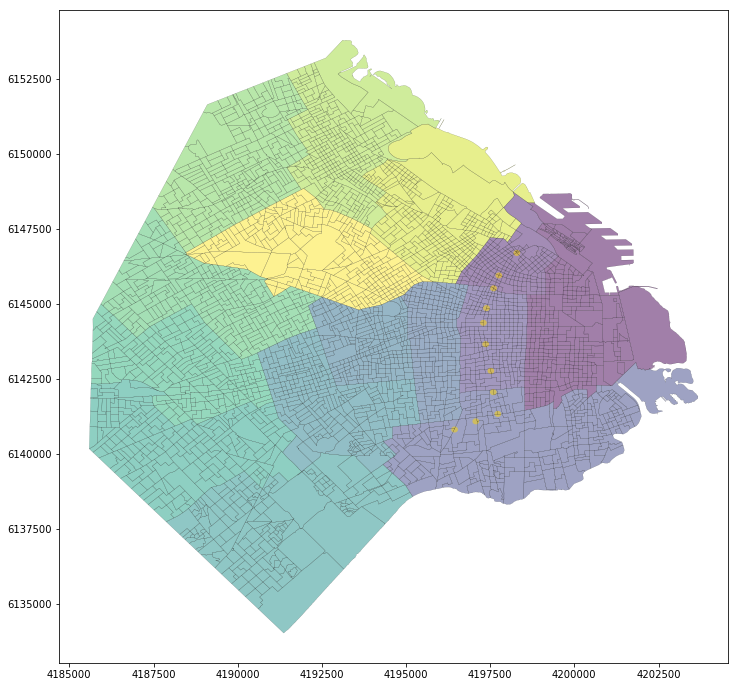

In [40]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = carto.plot(column='COMUNA',linewidth=0.1,ax=ax)
ax = lineaH.plot(color='gold',linewidth=0,ax=ax)

In [10]:
#hacer un buffer de 100 metros 
buffer100 = lineaH.geometry.buffer(100)
buffer100

0     POLYGON ((4197827.063387774 6141333.360672265,...
1     POLYGON ((4197693.042159097 6142056.945508167,...
2     POLYGON ((4197621.574693957 6142765.575720645,...
3     POLYGON ((4197466.159205765 6143655.914850389,...
4     POLYGON ((4197399.286664494 6144366.822915621,...
76    POLYGON ((4197490.663593302 6144857.372727079,...
77    POLYGON ((4197173.066238969 6141085.715733317,...
78    POLYGON ((4196542.833701421 6140813.051079692,...
83    POLYGON ((4197700.592952457 6145516.897313865,...
84    POLYGON ((4198391.949919427 6146694.888919007,...
85    POLYGON ((4197857.503609885 6145944.812464906,...
dtype: object

In [16]:
#corro el intersect para una sola estacion
indexLasHeras = lineaH.index[lineaH.ESTACION=='LAS HERAS']
lineaH.loc[indexLasHeras]

,ESTACION,ID,LINEA,geometry
84,LAS HERAS,85.0,H,POINT (4198291.949919427 6146694.888919007)


In [17]:
buffer100.loc[indexLasHeras]

84    POLYGON ((4198391.949919427 6146694.888919007,...
dtype: object

In [31]:
#obtengo la poblacion
carto.TOTAL_POB[carto.geometry.intersects(buffer100.loc[indexLasHeras].iloc[0])].sum()

4956

## Para todas las estaciones

In [60]:
lista = []

for estacion in lineaH.ESTACION:
    indexEstacion = lineaH.index[lineaH.ESTACION==estacion]
    lista.append(carto.TOTAL_POB[carto.geometry.intersects(buffer100.loc[indexEstacion].iloc[0])].sum())

lineaH['pobBuffer100'] = lista
lineaH

,ESTACION,ID,LINEA,geometry,buffer100,pobBuffer100
0,CASEROS,1.0,H,POINT (4197727.063387774 6141333.360672265),2274,2274
1,INCLAN,2.0,H,POINT (4197593.042159097 6142056.945508167),2590,2590
2,HUMBERTO 1°,3.0,H,POINT (4197521.574693957 6142765.575720645),4249,4249
3,VENEZUELA,4.0,H,POINT (4197366.159205765 6143655.914850389),4019,4019
4,ONCE - 30 DE DICIEMBRE,5.0,H,POINT (4197299.286664494 6144366.822915621),2070,2070
76,CORRIENTES,77.0,H,POINT (4197390.663593302 6144857.372727079),3221,3221
77,PARQUE PATRICIOS,78.0,H,POINT (4197073.066238969 6141085.715733317),2306,2306
78,HOSPITALES,79.0,H,POINT (4196442.833701421 6140813.051079692),3025,3025
83,CÓRDOBA,84.0,H,POINT (4197600.592952457 6145516.897313865),4001,4001
84,LAS HERAS,85.0,H,POINT (4198291.949919427 6146694.888919007),4956,4956


In [61]:
#Creo muchos buffers
buffers = [lineaH.geometry.buffer(radio) for radio in range(100,900,100)]

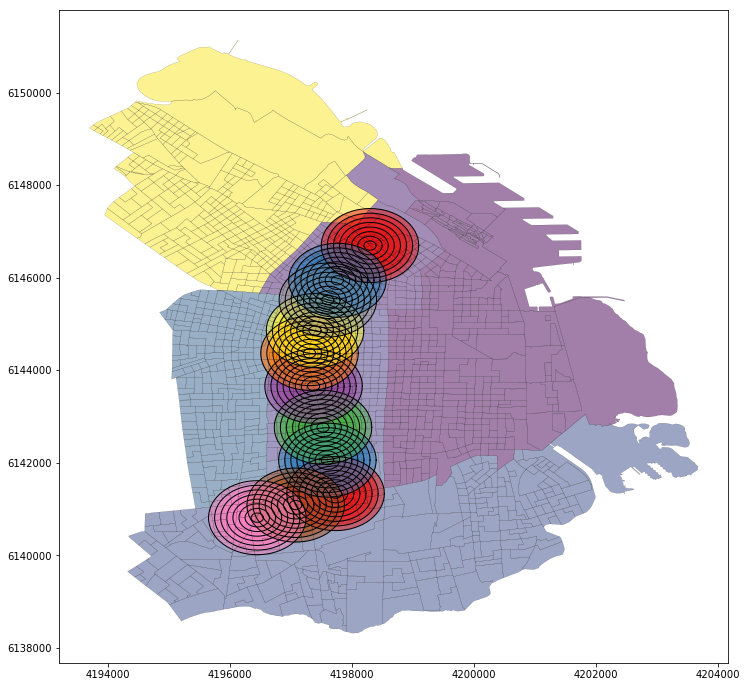

In [62]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = carto.plot(column='COMUNA',linewidth=0.1,ax=ax)
for bufer in buffers:
    bufer.plot(ax=ax)

In [66]:
for radio in range(100,900,100):
    #crea un buffer a partir del radio
    buff = lineaH.geometry.buffer(radio)
    
    lista = []

    for estacion in lineaH.ESTACION:
        indexEstacion = lineaH.index[lineaH.ESTACION==estacion]
        lista.append(carto.TOTAL_POB[carto.geometry.intersects(buff.loc[indexEstacion].iloc[0])].sum())

    lineaH['pobBuffer'+str(radio)] = lista

In [67]:
lineaH

,ESTACION,ID,LINEA,geometry,buffer100,pobBuffer100,pobBuffer200,pobBuffer300,pobBuffer400,pobBuffer500,pobBuffer600,pobBuffer700,pobBuffer800
0,CASEROS,1.0,H,POINT (4197727.063387774 6141333.360672265),2274,2274,5626,9716,12467,17223,25336,30064,31948
1,INCLAN,2.0,H,POINT (4197593.042159097 6142056.945508167),2590,2590,7373,12348,15460,21159,30765,39093,49509
2,HUMBERTO 1°,3.0,H,POINT (4197521.574693957 6142765.575720645),4249,4249,6710,11734,17725,26192,35992,49091,65221
3,VENEZUELA,4.0,H,POINT (4197366.159205765 6143655.914850389),4019,4019,8405,15591,27750,38110,51345,60900,75478
4,ONCE - 30 DE DICIEMBRE,5.0,H,POINT (4197299.286664494 6144366.822915621),2070,2070,6356,13809,23638,33255,48649,62329,79067
76,CORRIENTES,77.0,H,POINT (4197390.663593302 6144857.372727079),3221,3221,9771,14775,26407,35704,49529,62574,78705
77,PARQUE PATRICIOS,78.0,H,POINT (4197073.066238969 6141085.715733317),2306,2306,3695,9572,10841,16407,20769,27448,34522
78,HOSPITALES,79.0,H,POINT (4196442.833701421 6140813.051079692),3025,3025,3025,4613,13585,16472,20322,25348,31236
83,CÓRDOBA,84.0,H,POINT (4197600.592952457 6145516.897313865),4001,4001,13421,21616,34170,44925,61292,78103,96065
84,LAS HERAS,85.0,H,POINT (4198291.949919427 6146694.888919007),4956,4956,10431,17136,23730,37015,48689,65152,81211


In [73]:
lineaH.ESTACION = lineaH.ESTACION.map(lambda x: x.replace(u'Ó','O'))
lineaH.ESTACION = lineaH.ESTACION.map(lambda x: x.replace(u'\xb0',''))

In [74]:
lineaH.to_csv('poblacionLineaHporBufer.csv')

## Usando spatial joins

In [ ]:
#puedo hacerlo con spatial join
buffer100DF = lineaH.copy().loc[:,['ESTACION','geometry']]
buffer100DF.columns = ['buffer100','geometry']
buffer100DF.geometry = buffer100

intersections= gpd.sjoin(carto, buffer100DF, how="left", op='intersects')
intersections[intersections.buffer100.notnull()]